# Load and analyze data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,district_area,road_distance_1,road_distance_2,year_of_construction,bulvar_ring_km,bus_station_distance,cafe_count,fitness_center_distance,floor,district_population,...,product_type,public_transport_station_distance,sadovoe_km,base_school_distance,sport_count,state,district_name,timestamp,malls_count,railway_station_distance
0,6.407578e+06,1.422391,3.830951,NaN,13.675657,24.292406,152,0.485841,4.0,86206,...,Investment,3.299822,13.100618,0.177975,52,NaN,Bibirevo,2011-08-20,52,14.231961
1,9.589337e+06,2.887377,3.103996,NaN,8.132640,5.706113,177,0.668364,3.0,76284,...,Investment,0.783160,6.444333,0.273345,66,NaN,Nagatinskij Zaton,2011-08-23,40,9.242586
2,4.808270e+06,0.647250,2.927487,NaN,8.054252,6.710302,122,0.733101,2.0,101982,...,Investment,3.945073,6.963403,0.158072,67,NaN,Tekstil'shhiki,2011-08-27,35,9.540544
3,1.258354e+07,2.677824,2.780449,NaN,18.309433,6.734618,61,0.623484,9.0,21155,...,Investment,1.579164,17.457198,0.236455,26,NaN,Mitino,2011-09-01,22,17.478380
4,8.398461e+06,1.721834,3.133531,NaN,0.787593,1.423428,2283,0.220288,4.0,28179,...,Investment,0.857764,0.046810,0.376838,195,NaN,Basmannoe,2011-09-05,114,1.595898


In [3]:
column_types = {}
target = 'result_price'
num_features = []
cat_features = []

In [4]:
train_df = train_df[train_df['total_area'] > 1]

## Target

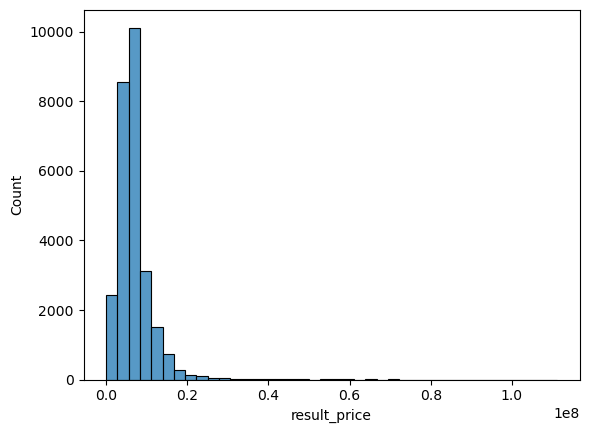

In [5]:
sns.histplot(
    data=train_df,
    x=target,
    bins=40
)
plt.show()

In [6]:
train_df['product_type'].unique()

array(['Investment', 'OwnerOccupier'], dtype=object)

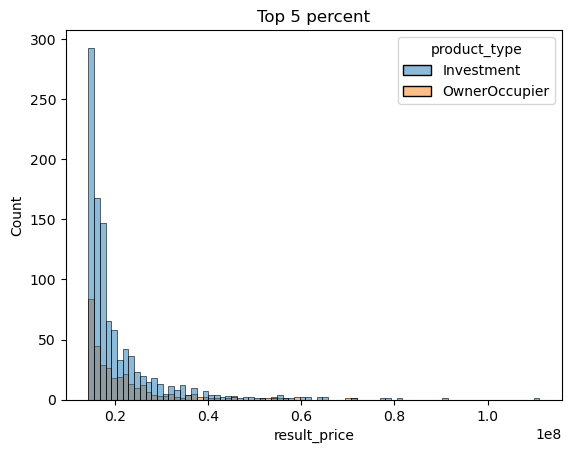

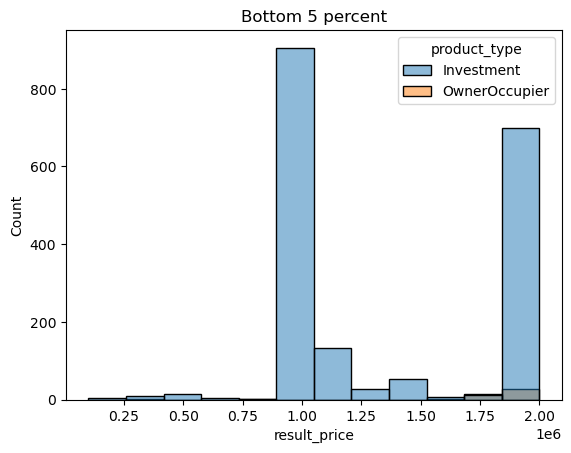

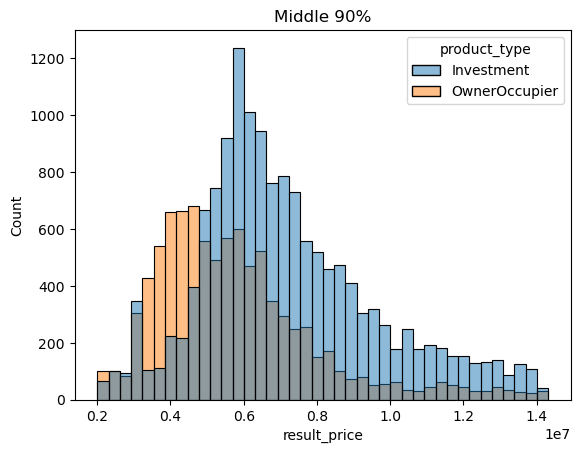

In [7]:
too_high_ids = (train_df[target] > train_df[target].quantile(0.95))
too_low_ids = (train_df[target] <= train_df[target].quantile(0.05))

plt.title('Top 5 percent')
sns.histplot(
    data=train_df[too_high_ids],
    x=target,
    # bins=40,
    hue='product_type'
)
plt.show()

plt.title('Bottom 5 percent')
sns.histplot(
    data=train_df[too_low_ids],
    x=target,
    # bins=40,
    hue='product_type'
)
plt.show()

plt.title('Middle 90%')
sns.histplot(
    data=train_df[~too_low_ids & ~too_high_ids],
    x=target,
    bins=40,
    hue='product_type'
)
plt.show()

## District

In [8]:
column_types['district'] = [
    'district_population',
    'district_name',
    'district_area',
]

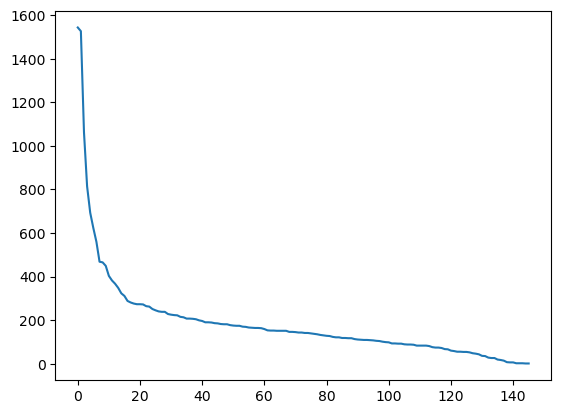

In [9]:
tmp = train_df['district_name'].value_counts().to_frame().reset_index()
plt.plot(tmp.index, tmp['district_name'])
plt.show()

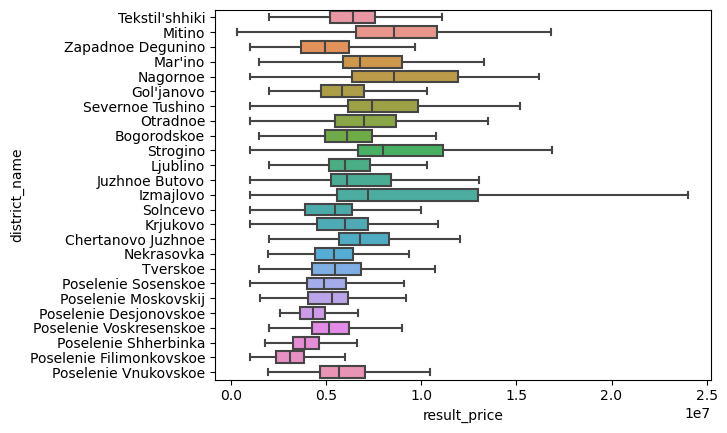

In [10]:
most_popular_districts = train_df['district_name'].value_counts().index[:25]

sns.boxplot(
    data=train_df[train_df['district_name'].isin(most_popular_districts)], 
    x=target, 
    y='district_name', 
    showfliers=False
)
plt.show()

### Feature engineering 

In [11]:
train_df['district_density'] = train_df['district_area'] / train_df['district_population']
column_types['district'] += ['district_density']

In [12]:
column_types['district'] += ['district_density']

In [13]:
cat_features += ['district_name']
num_features += ['district_population', 'district_area', 'district_density']

## Date

In [14]:
column_types['dates'] = ['timestamp']

### Feature engineering

In [15]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df['year'] = train_df['timestamp'].dt.year
train_df['month'] = train_df['timestamp'].dt.month.astype(str)
train_df['year_month'] = train_df['year'].astype(str) + '_' +  train_df['month'].astype(str)

min_date = datetime(year=2010, month=1, day=1)
assert min_date < train_df['timestamp'].min()
train_df['days_since'] = (train_df['timestamp'] - min_date).dt.days

column_types['dates'] += ['year', 'month', 'days_since']

In [16]:
num_features += ['days_since']

## Neighbourhood

In [17]:
column_types['neighbourhood'] = [
    'cafe_count',
    'base_school_distance',
    'road_distance_1',
    'road_distance_2',
    'bulvar_ring_km',
    'bus_station_distance',
    'fitness_center_distance',
    'green_part',
    'green_zone_distance',
    'healthcare_centers_count',
    'kremlin_distance',
    'leisure_count',
    'market_count',
    'metro_minutes',
    'mkad_distance',
    'office_count',
    'park_distance',
    'public_transport_station_distance',
    'sadovoe_km',
    'sport_count',
    'malls_count',
    'railway_station_distance',
]

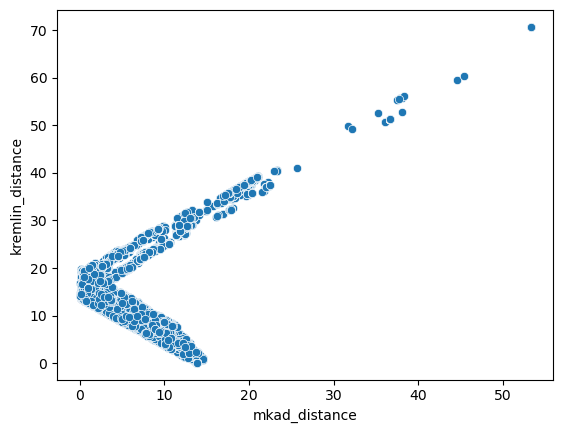

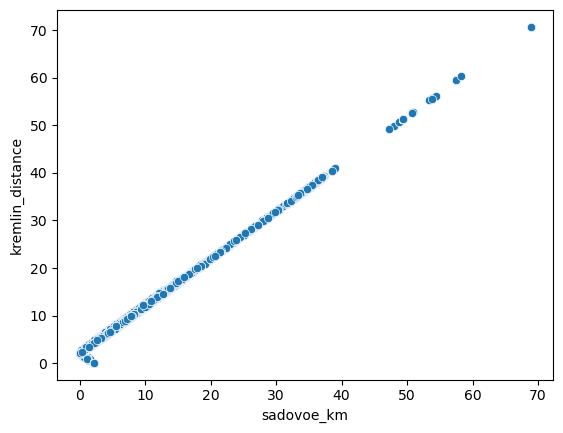

In [18]:
sns.scatterplot(
    data=train_df,
    x='mkad_distance',
    y='kremlin_distance',
)
plt.show()
sns.scatterplot(
    data=train_df,
    x='sadovoe_km',
    y='kremlin_distance',
)
plt.show()

In [19]:
train_df['mkad_distance_linaer'] = train_df['mkad_distance']
train_df['sadovoe_km_linear'] = train_df['sadovoe_km']

train_df.loc[train_df['kremlin_distance'] < 18, 'mkad_distance_linaer'] *= -1
train_df.loc[train_df['kremlin_distance'] < 2.5, 'sadovoe_km_linear'] *= -1

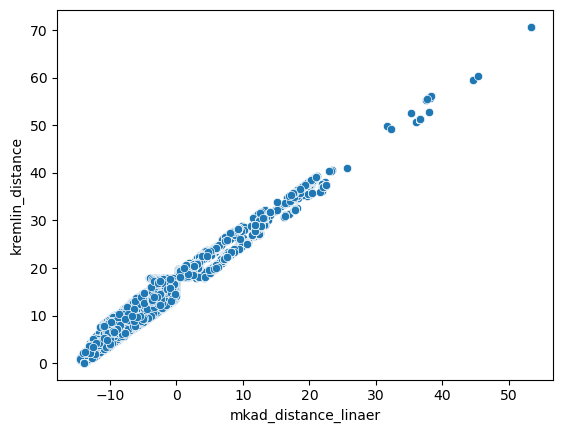

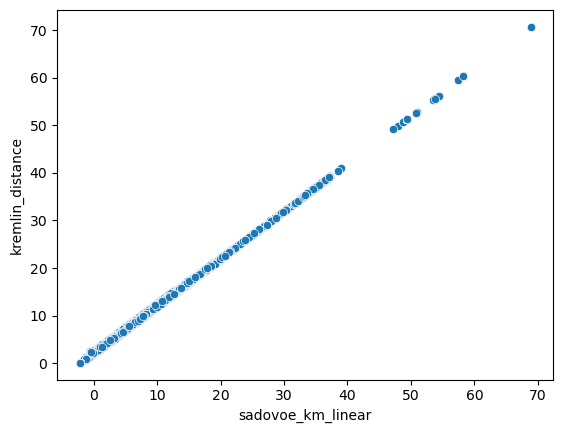

In [20]:
sns.scatterplot(
    data=train_df,
    x='mkad_distance_linaer',
    y='kremlin_distance',
)
plt.show()
sns.scatterplot(
    data=train_df,
    x='sadovoe_km_linear',
    y='kremlin_distance',
)
plt.show()

In [21]:
column_types['neighbourhood'] += ['mkad_distance_linaer', 'sadovoe_km_linear']

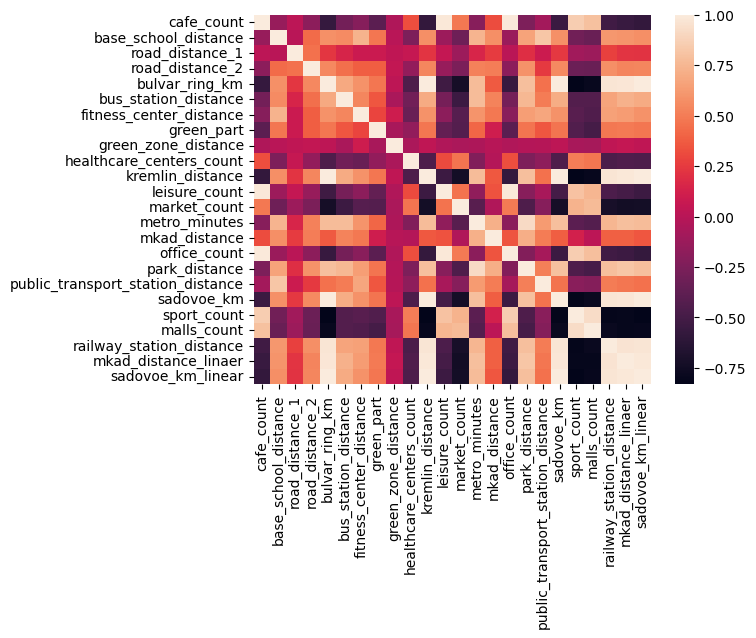

In [22]:
sns.heatmap(train_df[column_types['neighbourhood']].corr())
plt.show()

In [23]:
num_features += [
    'cafe_count',
    'base_school_distance',
    'road_distance_1',
    'bus_station_distance',
    'fitness_center_distance',
    'green_part',
    'green_zone_distance',
    'healthcare_centers_count',
    'kremlin_distance',
    'market_count',
    'metro_minutes',
    'park_distance',
    'public_transport_station_distance',
    'sport_count',
]

## Flat

In [24]:
column_types['flat'] = [
    'total_area',
    'living_area',
    'kitchen_area',
    'floor',
    'floors_num',
    'wall_material',
    'rooms_num',
    'product_type',
    'year_of_construction',
    'state',
]

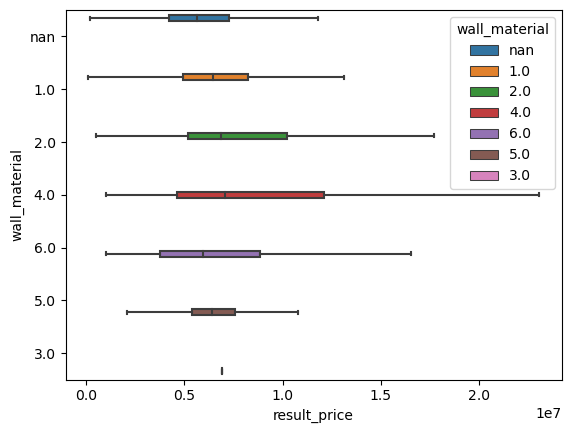

In [25]:
sns.boxplot(
    x=train_df[target],
    y=train_df['wall_material'].astype(str),
    hue=train_df['wall_material'].astype(str),
    showfliers=False    
)
plt.show()

In [26]:
train_df['wall_material'].astype(pd.Int64Dtype()).value_counts()

1    11979
2     2577
5     1381
4     1070
6      626
3        1
Name: wall_material, dtype: Int64

### Feature negineering

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
train_df['wall_material'] = train_df['wall_material'].astype(pd.Int64Dtype())
train_df.loc[train_df['wall_material'] == 3, 'wall_material'] = None
wall_imputer = SimpleImputer(strategy='most_frequent')

train_df.loc[:, ['wall_material']] = wall_imputer.fit_transform(train_df[['wall_material']]).astype(str)

/home/denis/miniconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/tmp/ipykernel_23884/70713644.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_df.loc[:, ['wall_material']] = wall_imputer.fit_transform(train_df[['wall_material']]).astype(str)


In [29]:
train_df['rooms_num'] = train_df['rooms_num'].astype(str)

In [30]:
cat_features += ['wall_material', 'product_type', 'rooms_num']

num_features += [
    'total_area',
    'living_area',
    'kitchen_area',
    'floor',
    'floors_num',
    'year_of_construction',
    'state',
]

# Feature engineering

In [31]:
train_df['prev_year'] = train_df['year'] - 1
train_df['square_price'] = train_df[target] / train_df['total_area']

train_df = train_df.merge(
    train_df.groupby('year')[target]\
        .median()\
        .reset_index()\
        .rename(columns={'year': 'prev_year', target: f'median_prev_year'}),
    on='prev_year',
    how='left'
)

train_df = train_df.merge(
    train_df.groupby(['year', 'district_name'])[target]\
        .median()\
        .reset_index()\
        .rename(columns={'year': 'prev_year', target: 'median_prev_year_district'}),
    on=['prev_year', 'district_name'],
    how='left'
)

In [32]:
column_types['prev_year'] = ['median_prev_year', 'median_prev_year_district']
num_features += ['median_prev_year', 'median_prev_year_district']

# Train test split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
ids = train_df['year'] != 2011

X_train, X_test, y_train, y_test = train_test_split(
    train_df.loc[ids, num_features + cat_features], 
    train_df.loc[ids, target], 
    test_size=0.3,
    random_state=42
)

# Make model

In [35]:
import numpy as np
import catboost as cb
import lightgbm
import optuna
from functools import partial
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [36]:
param = {
    'iterations': 250,
    'learning_rate': 0.06,
    'depth': 9,
    'cat_features': cat_features,
    'loss_function': 'RMSE',
    # 'task_type': 'GPU',
    # 'devices': '0:1',
}

min_trashold = 0.02
max_trashold = 0.98
ids = (y_train > y_train.quantile(min_trashold)) & (y_train < y_train.quantile(max_trashold))

gbm = cb.CatBoostRegressor(**param)
gbm.fit(
    X_train[ids],
    y_train[ids],
    eval_set=[(X_test, y_test)],
    verbose=False,
)

y_pred = gbm.predict(X_test)
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.46865615756293244

In [57]:
param = {
    'iterations': 500,
    'learning_rate': 0.07,
    'depth': 9,
    'cat_features': cat_features,
    'loss_function': 'RMSE',
    # 'task_type': 'GPU',
    # 'devices': '0:1',
}

min_trashold = 0.02
max_trashold = 0.98
ids = (y_train > y_train.quantile(min_trashold)) & (y_train < y_train.quantile(max_trashold))

gbm = cb.CatBoostRegressor(**param)
gbm.fit(
    X_train[ids],
    y_train[ids] / X_train.loc[ids, 'total_area'],
    eval_set=[(X_test, y_test / X_test['total_area'])],
    verbose=False,
)

In [58]:
gbm.best_iteration_

465

In [59]:
y_pred = gbm.predict(X_test) * X_test['total_area']
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.46361147940617253

In [75]:
def objective_catboost_with_args(trial, X_train, y_train, X_test, y_test, cat_features):

    param = {
        'iterations': trial.suggest_int('iterations', 150, 400),
        'learning_rate': trial.suggest_float('learning_rate', 0.1, 0.2),
        'depth': trial.suggest_int('depth', 4, 12),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-1, 3000),
        'score_function': trial.suggest_categorical('score_function', ['Cosine', 'L2']),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 10, 1500),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'cat_features': cat_features,
        'loss_function': 'RMSE',
        # 'task_type': 'GPU',
        # 'devices': '0:1',
    }

    # min_trashold = trial.suggest_float('min_trashold', 0, 0.1)
    # max_trashold = trial.suggest_float('max_trashold', 0.9, 0.999)
    min_trashold = 0
    max_trashold = 0.99
    ids = (y_train > y_train.quantile(min_trashold)) & (y_train < y_train.quantile(max_trashold))
   
    gbm = cb.CatBoostRegressor(**param)
    gbm.fit(
        X_train[ids],
        y_train[ids] / X_train.loc[ids, 'total_area'],
        verbose=False,
    )

    y_pred = gbm.predict(X_test) * X_test['total_area']

    if y_pred.min() < 0:
        return 1
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

In [76]:
objective_catboost = partial(
    objective_catboost_with_args, 
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test,
    y_test=y_test,
    cat_features=cat_features
)

In [77]:
gamma = lambda n_trials: min(int(np.ceil(0.1 * n_trials)), 25)
tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=30, n_ei_candidates=24, gamma=gamma)

study = optuna.create_study(
    direction='minimize',
    sampler=tpe_sampler,
    pruner=None
)

study.optimize(
    func=objective_catboost, 
    n_trials=50,
    timeout=None,
)

[I 2023-02-19 19:45:08,077] A new study created in memory with name: no-name-8ae8ee57-0705-49c1-9006-c5b751ad5dae
[I 2023-02-19 19:45:10,054] Trial 0 finished with value: 0.46513169006180766 and parameters: {'iterations': 287, 'learning_rate': 0.12909382325183671, 'depth': 5, 'reg_lambda': 1534.7471131574268, 'score_function': 'Cosine', 'bagging_temperature': 489.8394537581977, 'grow_policy': 'Lossguide'}. Best is trial 0 with value: 0.46513169006180766.
[I 2023-02-19 19:45:12,786] Trial 1 finished with value: 0.4734027687904645 and parameters: {'iterations': 311, 'learning_rate': 0.10836386235280385, 'depth': 7, 'reg_lambda': 2684.9492170737603, 'score_function': 'Cosine', 'bagging_temperature': 1031.8858921199153, 'grow_policy': 'SymmetricTree'}. Best is trial 0 with value: 0.46513169006180766.
[I 2023-02-19 19:45:19,135] Trial 2 finished with value: 0.47097515595204426 and parameters: {'iterations': 253, 'learning_rate': 0.12263907956875737, 'depth': 10, 'reg_lambda': 1717.787289499

In [78]:
optuna.visualization.plot_slice(study)

In [80]:
study.best_value

0.45452824208877424

In [79]:
study.best_params

{'iterations': 362,
 'learning_rate': 0.16718432545258516,
 'depth': 9,
 'reg_lambda': 1097.6407221008512,
 'score_function': 'L2',
 'bagging_temperature': 859.7654401613707,
 'grow_policy': 'Depthwise'}

{'iterations': 251, 'learning_rate': 0.05231249065126892, 'depth': 8}

{'iterations': 482,
 'learning_rate': 0.15914898864362242,
 'depth': 9,
 'reg_lambda': 60.839184102816375,
 'score_function': 'Cosine',
 'bagging_temperature': 1.6460075256746287,
 'grow_policy': 'Lossguide'}
 
{'iterations': 486,
 'reg_lambda': 2640.580028905731,
 'score_function': 'L2',
 'bagging_temperature': 1024.548823883425,
 'grow_policy': 'Lossguide',
 'min_trashold': 0.00460303503681937,
 'max_trashold': 0.9998031075166454}

# Predict

## Feature engineering

In [81]:
test_df = pd.read_csv('test.csv')

In [82]:
test_df['district_density'] = test_df['district_area'] / test_df['district_population']

In [83]:
test_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
test_df['year'] = test_df['timestamp'].dt.year
test_df['month'] = test_df['timestamp'].dt.month.astype(str)
test_df['year_month'] = test_df['year'].astype(str) + '_' +  test_df['month'].astype(str)

min_date = datetime(year=2010, month=1, day=1)
assert min_date < test_df['timestamp'].min()
test_df['days_since'] = (test_df['timestamp'] - min_date).dt.days

In [84]:
test_df['mkad_distance_linaer'] = test_df['mkad_distance']
test_df['sadovoe_km_linear'] = test_df['sadovoe_km']

test_df.loc[test_df['kremlin_distance'] < 18, 'mkad_distance_linaer'] *= -1
test_df.loc[test_df['kremlin_distance'] < 2.5, 'sadovoe_km_linear'] *= -1

test_df['wall_material'] = test_df['wall_material'].astype(pd.Int64Dtype())
test_df.loc[test_df['wall_material'] == 3, 'wall_material'] = None

test_df.loc[:, ['wall_material']] = wall_imputer.transform(test_df[['wall_material']]).astype(str)

/tmp/ipykernel_23884/3787922401.py:10: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [85]:
test_df['prev_year'] = test_df['year'] - 1

test_df = test_df.merge(
    train_df.groupby('year')[target]\
        .median()\
        .reset_index()\
        .rename(columns={'year': 'prev_year', target: f'median_prev_year'}),
    on='prev_year',
    how='left'
)

test_df = test_df.merge(
    train_df.groupby(['year', 'district_name'])[target]\
        .median()\
        .reset_index()\
        .rename(columns={'year': 'prev_year', target: 'median_prev_year_district'}),
    on=['prev_year', 'district_name'],
    how='left'
)

In [86]:
test_df['estimate_prev_year'] = test_df['median_prev_year'] * test_df['total_area']
test_df['estimate_prev_year_district'] = test_df['median_prev_year_district'] * test_df['total_area']

In [87]:
test_df['rooms_num'] = test_df['rooms_num'].astype(str)

## Model

In [89]:
my_params = {
    'iterations': 362,
    'learning_rate': 0.16718432545258516,
    'depth': 9,
    'reg_lambda': 1097.6407221008512,
    'score_function': 'L2',
    'bagging_temperature': 859.7654401613707,
    'grow_policy': 'Depthwise',
    'cat_features': cat_features
}

In [90]:
ids = train_df['year'] != 2010
ids = ids & (train_df['square_price'] < train_df['square_price'].quantile(0.99))

In [91]:
model = cb.CatBoostRegressor(**my_params)
model.fit(train_df.loc[ids, cat_features + num_features], train_df.loc[ids, 'square_price'], verbose=False)

In [92]:
y_pred = model.predict(test_df[cat_features + num_features])
test_df['square_price'] = y_pred

In [93]:
test_df['result_price'] = test_df['square_price'] * test_df['total_area']
test_df[['id', 'result_price']].to_csv('sub5.csv', index=None)

<AxesSubplot:>

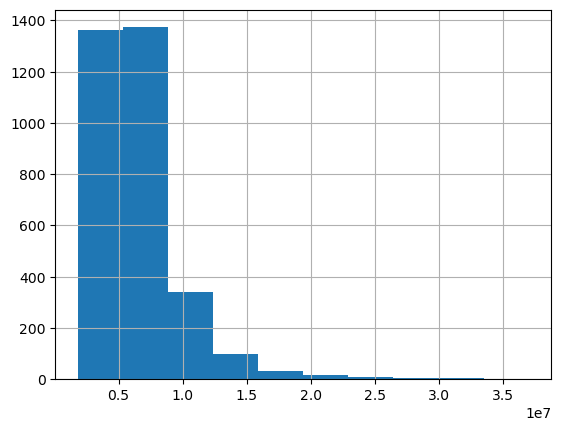

In [94]:
test_df['result_price'].hist()